<a href="https://colab.research.google.com/github/harshith-118/MachineLearningProjects/blob/main/GlaucomaDetector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing the Keras libraries and packages
import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
from keras.callbacks import History 
history = History()

Using TensorFlow backend.


In [ ]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
#lists the content of your google drive
!ls "/content/drive/My Drive/"

In [ ]:
#Defining the training and test paths
train_path = "/content/drive/My Drive/Glaucoma Project/Train"
test_path = "/content/drive/My Drive/Glaucoma Project/Test"

In [ ]:
train_batches = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, 
       height_shift_range=0.1, shear_range=0.15, zoom_range=0.1, 
       channel_shift_range=10., horizontal_flip=True).flow_from_directory(train_path, target_size=(224,224), classes =['Glaucoma','Non Glaucoma'], batch_size=32)
test_batches = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, 
       height_shift_range=0.1, shear_range=0.15, zoom_range=0.1, 
       channel_shift_range=10., horizontal_flip=True).flow_from_directory(test_path, target_size=(224,224), classes =['Glaucoma','Non Glaucoma'], batch_size=32)


Found 64 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [ ]:
#Importing predefined model (VGG 16) 
vgg16_model = keras.applications.vgg16.VGG16()

In [ ]:
#Building the new model using VGG 16

In [ ]:
type(vgg16_model)

keras.engine.training.Model

In [ ]:
model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)

In [ ]:
for layer in model.layers:
    layer.trainable = False
model.add(Dense(2, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [ ]:
#Training the model using VGG-16
model.compile(Adam(lr=.0001), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit_generator(train_batches, 
                    steps_per_epoch=20, 
                    validation_data= test_batches, 
                    validation_steps=20,
                    epochs=20,
                    verbose=2)

Epoch 1/20
 - 502s - loss: 0.1879 - acc: 0.9516 - val_loss: 0.1743 - val_acc: 0.9406
Epoch 2/20
 - 499s - loss: 0.0607 - acc: 0.9937 - val_loss: 0.0564 - val_acc: 1.0000
Epoch 3/20
 - 498s - loss: 0.0323 - acc: 1.0000 - val_loss: 0.0431 - val_acc: 0.9938
Epoch 4/20
 - 498s - loss: 0.0236 - acc: 0.9984 - val_loss: 0.0353 - val_acc: 1.0000
Epoch 5/20
 - 497s - loss: 0.0151 - acc: 1.0000 - val_loss: 0.0250 - val_acc: 1.0000
Epoch 6/20
 - 503s - loss: 0.0104 - acc: 1.0000 - val_loss: 0.0240 - val_acc: 1.0000
Epoch 7/20
 - 510s - loss: 0.0094 - acc: 1.0000 - val_loss: 0.0147 - val_acc: 1.0000
Epoch 8/20
 - 506s - loss: 0.0082 - acc: 1.0000 - val_loss: 0.0169 - val_acc: 1.0000
Epoch 9/20
 - 502s - loss: 0.0074 - acc: 1.0000 - val_loss: 0.0128 - val_acc: 1.0000
Epoch 10/20
 - 507s - loss: 0.0080 - acc: 1.0000 - val_loss: 0.0124 - val_acc: 1.0000
Epoch 11/20
 - 507s - loss: 0.0062 - acc: 1.0000 - val_loss: 0.0106 - val_acc: 1.0000
Epoch 12/20
 - 503s - loss: 0.0051 - acc: 1.0000 - val_loss: 0.

In [ ]:
#Predicting the models with VGG-16
def plots(ims, figsize=(12,6), rows=5, interp=False, titles=None):
  if type(ims[0]) is np.ndarray:
    ims = np.array(ims).astype(np.uint8)
    if(ims.shape[-1] != 3):
      ims = ims.transpose ((0,2,3,1))
  f = plt.figure(figsize = figsize)
  cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows +1
  for i in range(len(ims)):
    sp = f.add_subplot (rows, cols, i+1)
    sp.axis('Off')
    if titles is not None:
      sp.set_title(titles[i], fontsize =10)
    plt.imshow(ims[i], interpolation=None if interp else 'none')

In [ ]:
test_batches_fine = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, 
       height_shift_range=0.1, shear_range=0.15, zoom_range=0.1, 
       channel_shift_range=10., horizontal_flip=True).flow_from_directory(test_path, target_size=(224,224), classes =['Glaucoma','Non Glaucoma'], batch_size=50)

Found 15 images belonging to 2 classes.


In [ ]:
test_imgs, test_labels = next(test_batches_fine)

[1 0 0 1 0 0 1 0 1 1 1 0 0 1 0]


/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


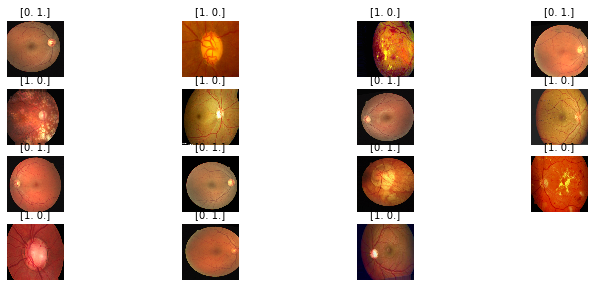

In [ ]:
x_labels = test_labels.argmax(axis=1)
print(x_labels)
plots(test_imgs, titles=test_labels)

In [ ]:
x_labels



array([1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0])

In [ ]:
predictions = model.predict_generator(test_batches_fine, steps=1, verbose=0)
y_labels = predictions.argmax(axis=1)
y_labels

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1])

In [ ]:
def plot_confusion_matrix(cm, classes, 
                          normalize=False,
                         title = 'Confusion Matrix',
                         cmap=plt.cm.Blues):
  
  plt.imshow(cm, interpolation = 'nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation = 45)
  plt.yticks(tick_marks, classes)
  
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1) [:, np.newaxis]
    print("Normalized Confusion Matrix")
  else:
    print("Confusion Matrix without normalization")
  
  print(cm)
  
  thresh = cm.max() / 2.
  
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i, cm[i,j],
            horizontalalignment ="center",
            color = "white" if cm[i,j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
  

Confusion Matrix without normalization
[[3 5]
 [5 2]]


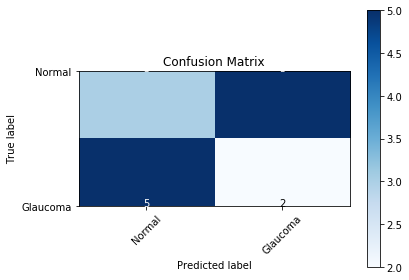

In [ ]:
cm = confusion_matrix(x_labels, y_labels)
cm_plot_labels = ['Normal','Glaucoma']
plot_confusion_matrix(cm, cm_plot_labels, title ='Confusion Matrix')

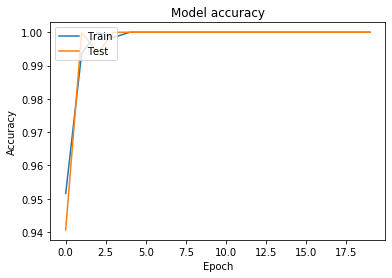

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

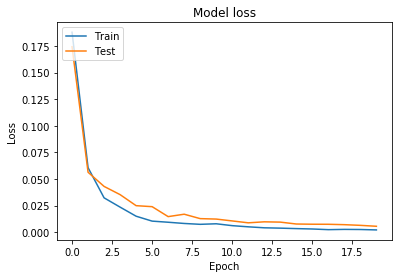

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()